<a href="https://colab.research.google.com/github/karol10542/MyRepo/blob/main/cwiczenia_3a_regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **A regression example**

Common type of machine learning problem is "regression", which consists of predicting a continuous value instead of a discrete label. For instance, predicting the temperature tomorrow, given meteorological data, or predicting the time that a software project will take to complete, given its specifications.



In [ ]:

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt



**1-dimensional data**

In [ ]:
def funct(x):
  return x*x*np.sin(x)+np.log(2*x)

size = 150
low=0
high=12
error=14

XX_train = np.random.uniform(low=low, high=high, size=size)
XX_test = np.random.uniform(low=low, high=high, size=size)
yy_train = funct(XX_train) + np.random.normal(0., error, size)
yy_test = funct(XX_test) + np.random.normal(0., error, size)

print(XX_train.shape, yy_train.shape)

(150,) (150,)


Plot the function and data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show>

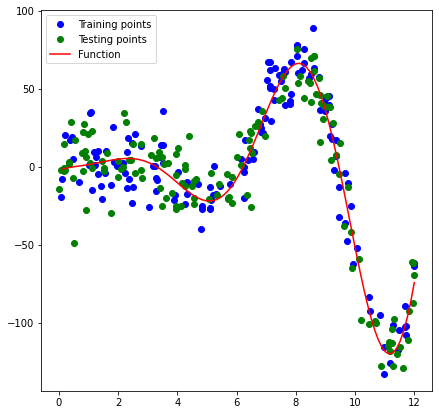

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train,yy_train, 'o', color='blue', label='Training points')
plt.plot(XX_test,yy_test, 'o', color='green', label='Testing points')

points = np.linspace(low, high,num=100)
plt.plot(points, funct(points),  color='red', label='Function')
plt.legend()


plt.show


**Preparing the data**

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:


In [ ]:
# Tutaj należy znormalizować dane, i.e. 
# - odjąć średnią
# - podzielić przez odchylenie standardowe

# 
mean = XX_train.mean(axis=0)
XX_train_n = XX_train-mean
std = XX_train_n.std(axis=0)
XX_train_n /= std

# to samo dla X_test
XX_test_n = XX_test - mean
XX_test_n /= std

mean2=yy_train.mean(axis=0)
yy_train_n=yy_train-mean2
std2=yy_train_n.std(axis=0)
yy_train_n /=std2


yy_test_n = yy_test - mean2
yy_test_n /=std2


# A teraz to samo dla yy_train i yy_test


Define neural network

In [ ]:
# Zbudować sieć neuronową, działa: dwie warstwy ukryte, aktywacja relu
from keras import models
from keras import layers

model0 = Sequential(name='network')
model0.add(layers.Dense(1024,activation='relu' , input_shape=(1,)))
model0.add(Dropout(0.1))
model0.add(layers.Dense(1024,activation='relu'))
model0.add(Dropout(0.1))
model0.add(layers.Dense(1,activation='linear'))


model0.summary()

Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              2048      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 1,052,673
Trainable params: 1,052,673
Non-trainable params: 0
_________________________________________________________________


Train neural network

For regression problems, mean squared error (MSE) is often employed




In [ ]:
# compile and train NN
# Uwaga: dla regresji używamy: loss = 'mean_squared_error'   oraz metrics = ['mse']

opti=optimizers.RMSprop(lr=0.001)
model0.compile(optimizer=opti,loss='mean_squared_error',metrics=['mse'])
history=model0.fit(XX_train_n,yy_train_n,epochs=400,batch_size=128,validation_data=(XX_test_n,yy_test_n),verbose=1)

Epoch 1/400
2/2 [==============================] - 0s 81ms/step - loss: 1.0520 - mse: 1.0520 - val_loss: 0.9950 - val_mse: 0.9950
Epoch 2/400
2/2 [==============================] - 0s 14ms/step - loss: 0.9412 - mse: 0.9412 - val_loss: 0.7110 - val_mse: 0.7110
Epoch 3/400
2/2 [==============================] - 0s 13ms/step - loss: 0.7980 - mse: 0.7980 - val_loss: 1.0207 - val_mse: 1.0207
Epoch 4/400
2/2 [==============================] - 0s 13ms/step - loss: 0.9090 - mse: 0.9090 - val_loss: 0.7687 - val_mse: 0.7687
Epoch 5/400
2/2 [==============================] - 0s 13ms/step - loss: 0.7163 - mse: 0.7163 - val_loss: 0.5463 - val_mse: 0.5463
Epoch 6/400
2/2 [==============================] - 0s 13ms/step - loss: 0.6298 - mse: 0.6298 - val_loss: 0.6443 - val_mse: 0.6443
Epoch 7/400
2/2 [==============================] - 0s 14ms/step - loss: 0.6271 - mse: 0.6271 - val_loss: 0.7378 - val_mse: 0.7378
Epoch 8/400
2/2 [==============================] - 0s 14ms/step - loss: 0.6255 - mse: 0.62

Plot loss

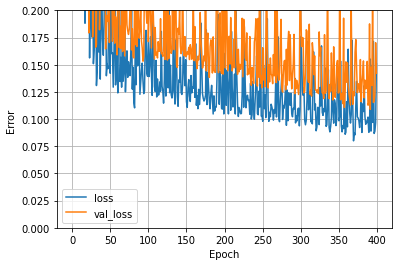

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.2])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

plot_loss(history)


Evaluate neural network

In [ ]:
results = model0.evaluate(XX_test_n, yy_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model0.evaluate(XX_train_n, yy_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

5/5 [==============================] - 0s 3ms/step - loss: 0.1421 - mse: 0.1421
loss test data:  0.14208020269870758
mse test data:  0.14208020269870758
5/5 [==============================] - 0s 3ms/step - loss: 0.1019 - mse: 0.1019
loss train data:  0.10185514390468597
mse train data:  0.10185514390468597


Plot results

<function matplotlib.pyplot.show>

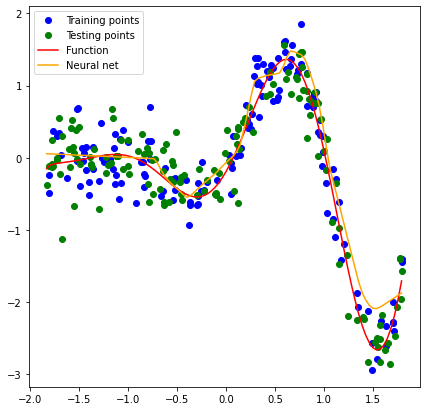

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n,yy_train_n, 'o', color='blue', label='Training points')
plt.plot(XX_test_n,yy_test_n, 'o', color='green', label='Testing points')

points = np.linspace(min(XX_test_n), max(XX_test_n),num=100)
plt.plot(points, (funct(points*std+mean)-mean2)/std2,  color='red', label='Function')

plt.plot(points, model0.predict(points),  color='orange', label='Neural net')


plt.legend()


plt.show

**The Boston Housing Price dataset**

We will be attempting to predict the median price of homes in a given Boston suburb in the mid-1970s, given a few data points about the suburb at the time, such as the crime rate, the local property tax rate, etc.

The dataset has very few data points, only 506 in total, split between 404 training samples and 102 test samples, and each "feature" in the input data (e.g. the crime rate is a feature) has a different scale. For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12, others between 0 and 100...

In [ ]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()



**Preparing the data**

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:


Define, compile and train neural network

In [ ]:

model = Sequential()




In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)


Evaluate neural network

In [ ]:
results = model.evaluate(X_test_n, y_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model.evaluate(X_train_n, y_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])